# The Sparks Foundation - Data Science and Business Analytics Internship

### Task 1 - Prediction using Supervised ML

### By :Siddesh Pardeshi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Information :

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# EDA :

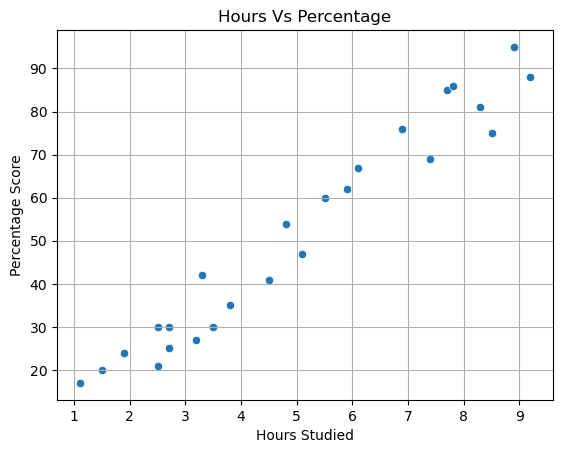

In [5]:
#Plotting the distribution of scores
sns.scatterplot(x='Hours', y='Scores',data=data)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours Vs Percentage')
plt.grid(True)

From the above scatterplot we can see that there is a **positive linear relation** between the number of **hours studied and percentage scored.**

# Train-Test Split :

In [6]:
x = data.drop('Scores', axis = 1)
y = data['Scores']

In [7]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
#Checking the shape of data after train-test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


# Linear Regression :

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [10]:
#predicting on train data
y_pred_train = lin_reg.predict(x_train)

In [11]:
#predicting on test data
y_pred_test = lin_reg.predict(x_test)

# Model Evaluation :

In [12]:
from sklearn import metrics

**R2_Score:**

In [13]:
r2_train = metrics.r2_score(y_train,y_pred_train)
print("R2 score for training set is {}".format(r2_train))

R2 score for training set is 0.9515510725211552


In [14]:
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for test set is {}".format(r2_test))

R2 score for test set is 0.9454906892105354


**Observation:**

        From the above r2 score 0.9454 is a good fit for this model.

**Mean Squared Error:**

In [15]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
print('MSE for training set is {}'.format(MSE_train))

MSE for training set is 30.898182377314544


**RMSE :**

In [16]:
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for test set is {}'.format(MSE_test))

MSE for test set is 21.598769307217456


**RMSE :**

In [21]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 5.558613350226344


In [22]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 4.647447612100373


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [18]:
# predicted score if a student studies for 9.25 hrs/ day
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lin_reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
